In [1]:
#Author: K.A.Rousan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import matplotlib as mpl
mpl.rcParams.update({"text.usetex":True})

In [3]:
#loading data
files = ['white','blue','green','red']
Intensity = [];Resistance = []
Distance = []
for i in files:
    df = pd.read_excel(i+'.xlsx')
    dist = np.array(df["Distance(cm)"])
    Inte = np.array(df["Intensity(Lux)"])
    V = np.array(df["Voltage(V)"])
    I = np.array(df["Current(mA)"])*0.001
    R = V/I
    print("For ",i," Intensity = ",Inte)
    print("For ",i," resistance = ",R)
    Distance.append(dist)
    Resistance.append(R)
    Intensity.append(Inte)
    print("-------------------------------------------------------------")

For  white  Intensity =  [ 3100  3520  4250  4990  6060  7880  9750 12460 16000]
For  white  resistance =  [612.5        554.21686747 500.         465.90909091 402.17391304
 343.75       303.03030303 252.42718447 214.95327103]
-------------------------------------------------------------
For  blue  Intensity =  [1120 1340 1550 1840 2280 2380 3160 3840 4300]
For  blue  resistance =  [3276.66666667 2990.625      2660.         2368.42105263 2121.95121951
 1853.33333333 1612.24489796 1336.36363636 1125.        ]
-------------------------------------------------------------
For  green  Intensity =  [1090 1270 1480 1910 2130 2210 2970 3690 3990]
For  green  resistance =  [1213.79310345 1080.64516129  972.30769231  847.14285714  739.18918919
  646.15384615  533.33333333  435.55555556  360.        ]
-------------------------------------------------------------
For  red  Intensity =  [280 340 380 460 570 590 710 880 910]
For  red  resistance =  [1562.         1340.         1215.51724138 1044.44

In [4]:
#fit_curves
def inte_resis_log(I,m,c):
    return I*m + c
def res_dist_sq(d,m,b):
    return m*(d**(-b))

In [5]:
#processing
log_inte = []; log_resis = []; para = []
plot_array = []
for i in range(len(files)):
    a = np.log(Intensity[i]); b = np.log(Resistance[i])
    log_inte.append(a); log_resis.append(b)
    param, pcov= curve_fit(inte_resis_log,a,b)
    para.append(param)
    array = np.linspace(min(a)-0.1,max(a)+0.1,1000)
    plot_array.append(array)
#     print(a);print(b)
    print("(slope, intersection) = ",param)
para_d = [];dist_inv = []
for i in range(len(files)):
    o_by_dist_sq = 1/Distance[i]**2
    dist_inv.append(o_by_dist_sq)
for i in range(len(files)):
    param, pcov = curve_fit(res_dist_sq,dist_inv[i],Resistance[i])
    para_d.append(param)
array_d = np.linspace(0.0003,0.01,1000)
#     print(param)

(slope, intersection) =  [-0.6308361  11.49055639]
(slope, intersection) =  [-0.77245898 13.56170916]
(slope, intersection) =  [-0.90240867 13.46308859]
(slope, intersection) =  [-1.03253158 13.24040194]


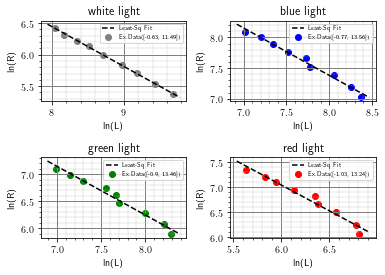

In [6]:
#analysis
Color = ["grey","blue","green","red"]
fig = plt.figure()
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.3)
for i in range(len(files)):
    ax = fig.add_subplot(2,2,i+1)
#     ax.subplot(2,2,i+1)
    ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="1")
    ax.grid(which = "minor",linestyle = "--", linewidth="0.4")
    ax.minorticks_on()
    ax.plot(plot_array[i],
            inte_resis_log(plot_array[i],para[i][0],para[i][1]),
            ls="--" ,color="black",label="Least-Sq Fit")
    ax.scatter(log_inte[i],log_resis[i],color=Color[i],
               label="Ex.Data(%s)"%[round(para[i][0],2),round(para[i][1],2)])
    ax.legend(loc='best',prop={'size':6})
    ax.title.set_text(" %s light"%(files[i]))
    plt.xlabel("ln(L)")
    plt.ylabel("ln(R)")
plt.savefig('All_for_one.pdf')
plt.show()

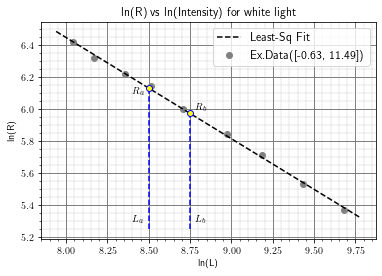

In [7]:
#still have to make this one automatic
def plot_single(i,points=[0,0]):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="1")
    ax.grid(which = "minor",linestyle = "--", linewidth="0.4")
    ax.minorticks_on()
    ax.plot(plot_array[i],
            inte_resis_log(plot_array[i],para[i][0],para[i][1]),
            ls="--" ,color="black",label="Least-Sq Fit")
    ax.scatter(log_inte[i],log_resis[i],color=Color[i],
               label="Ex.Data(%s)"%[round(para[0][0],2),round(para[0][1],2)])
#     ax.plot([pointsx[0],pointsx[0]],[pointsy[0],
#                 inte_resis_log(pointsx[0],para[i][0],para[i][1])],color="Blue",ls="--")
#     ax.plot([pointsx[1],pointsx[1]],[pointsy[1],
#                 inte_resis_log(pointsx[1],para[i][0],para[i][1])],color="Blue",ls="--")
    ax.plot([8.50,8.50],[5.25,inte_resis_log(8.50,para[0][0],para[0][1])],color="Blue",ls="--")
    ax.plot([8.75,8.75],[5.25,inte_resis_log(8.75,para[0][0],para[0][1])],color="Blue",ls="--")
    ax.plot(8.50,inte_resis_log(8.50,para[0][0],para[0][1]),marker="o",markeredgecolor="Blue",markerfacecolor="Yellow")
    ax.plot(8.75,inte_resis_log(8.75,para[0][0],para[0][1]),marker="o",markeredgecolor="Blue",markerfacecolor="Yellow")
    plt.annotate("$L_a$",xy=(8.52,5.2),xytext=(8.40,5.3))
    plt.annotate("$L_b$",xy=(8.78,5.2),xytext=(8.78,5.3))
    plt.annotate("$R_a$",xy=(8.52,6.1),xytext=(8.40,6.1))
    plt.annotate("$R_b$",xy=(8.78,6),xytext=(8.78,6))
    ax.legend(loc='best',prop={'size':12})
    ax.title.set_text("ln(R) vs ln(Intensity) for %s light"%files[i])
    plt.xlabel("ln(L)")
    plt.ylabel("ln(R)")
    plt.savefig('%s_light.pdf'%files[i])
    plt.show()
plot_single(0)

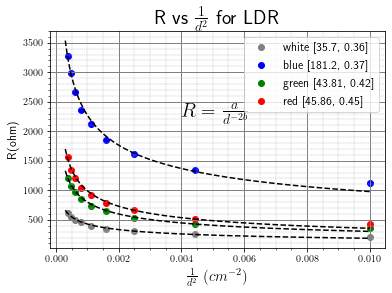

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="1")
ax.grid(which = "minor",linestyle = "--", linewidth="0.4")
ax.minorticks_on()
for i in range(len(files)):
    o_by_dist_sq = 1/Distance[i]**2
    ax.scatter(o_by_dist_sq,Resistance[i],color=Color[i],
               label="%s %s"%(files[i],[round(para_d[i][0],2),round(para_d[i][1],2)]))
    ax.plot(array_d,res_dist_sq(array_d,para_d[i][0],para_d[i][1]),
            color="black",ls="--")
ax.legend(loc='best',prop={'size':12})
plt.annotate(r'$R = \frac{a}{d^{-2b}}$',xy=(0.004,2250),xytext=(0.004,2250),fontsize=20)
plt.title(r"R vs $\frac{1}{d^2}$  for LDR",fontsize=20)
plt.ylabel("R(ohm)",fontsize=12)
plt.xlabel(r'$\frac{1}{d^2}$ $(cm^{-2})$',fontsize=15)
plt.savefig('dist_res.pdf')
plt.show()